# Installations and Imports

In [44]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [84]:
# Importing required libraries

import pandas as pd
from sklearn.utils import resample
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")

# Feature Exploration

In [85]:
# Viewing training dataset

train_data = pd.read_csv('/Users/aryashrinu/Desktop/weather_aus_training_data.csv')
train_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [86]:
# Viewing feature columns

column_names = train_data.columns
column_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [87]:
# Analyzing feature categories

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49424 entries, 0 to 49423
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           49424 non-null  object 
 1   Location       49424 non-null  object 
 2   MinTemp        49077 non-null  float64
 3   MaxTemp        49260 non-null  float64
 4   Rainfall       48809 non-null  float64
 5   Evaporation    22507 non-null  float64
 6   Sunshine       17707 non-null  float64
 7   WindGustDir    44878 non-null  object 
 8   WindGustSpeed  44885 non-null  float64
 9   WindDir9am     44383 non-null  object 
 10  WindDir3pm     47534 non-null  object 
 11  WindSpeed9am   48438 non-null  float64
 12  WindSpeed3pm   48167 non-null  float64
 13  Humidity9am    48702 non-null  float64
 14  Humidity3pm    48505 non-null  float64
 15  Pressure9am    41809 non-null  float64
 16  Pressure3pm    41858 non-null  float64
 17  Cloud9am       29478 non-null  float64
 18  Cloud3

## Findings:

### From the above, there is a mixture of categorical and numerical features. 

### Categorical features have the datatype as object and numerical features have the datatype as float64. 

### We see some of the features have missing values in the dataset.

In [88]:
# Viewing statistical properties of all features 

train_data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,49424,49424,49077.000000,49260.000000,48809.000000,22507.000000,17707.000000,44878,44885.000000,44383,...,48505.000000,41809.000000,41858.000000,29478.000000,29033.000000,48881.000000,48652.000000,48809,49424.000000,49424
unique,2735,22,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,7/6/10,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,22,2718,NaN,NaN,NaN,NaN,NaN,3741,NaN,3650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37977,NaN,38420
mean,NaN,NaN,11.470699,22.403618,2.452183,5.271360,7.424233,NaN,39.854138,NaN,...,52.857664,1018.383312,1015.960340,4.531481,4.613819,16.065711,20.957741,NaN,2.469143,NaN
std,NaN,NaN,6.381146,6.919740,8.532466,4.093008,3.836154,NaN,14.232263,NaN,...,20.753841,7.039554,6.941918,2.909149,2.699023,6.129276,6.740999,NaN,8.558594,NaN
min,NaN,NaN,-8.500000,-4.100000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,...,1.000000,980.500000,979.000000,0.000000,0.000000,-6.200000,-5.100000,NaN,0.000000,NaN
25%,NaN,NaN,6.900000,17.800000,0.000000,2.600000,4.600000,NaN,30.000000,NaN,...,38.000000,1013.600000,1011.200000,1.000000,2.000000,11.800000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,11.800000,22.100000,0.000000,4.400000,8.300000,NaN,39.000000,NaN,...,53.000000,1018.500000,1016.000000,5.000000,5.000000,16.500000,20.600000,NaN,0.000000,NaN
75%,NaN,NaN,16.600000,26.700000,0.600000,7.000000,10.400000,NaN,48.000000,NaN,...,67.000000,1023.200000,1020.700000,7.000000,7.000000,20.600000,25.100000,NaN,0.600000,NaN


In [89]:
# Exploring the frequency distribution of the target variable 'RainTomorrow'

train_data['RainTomorrow'].value_counts()/len(train_data)

No     0.777355
Yes    0.222645
Name: RainTomorrow, dtype: float64

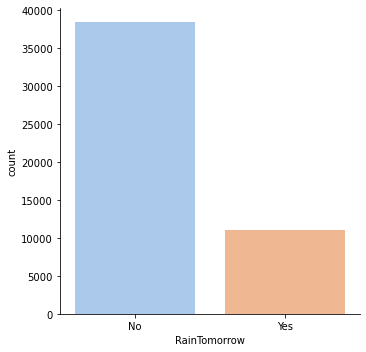

In [90]:
# Visualizing the frequency distribution of the target variable 'RainTomorrow'

import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="RainTomorrow", kind="count", palette="pastel", data=train_data)

## Findings

### The above exploration confirms that 'No' class label occurs 77% and the 'Yes' occurs 22%.

### This indicates we are dealing with an unbalanced dataset. 

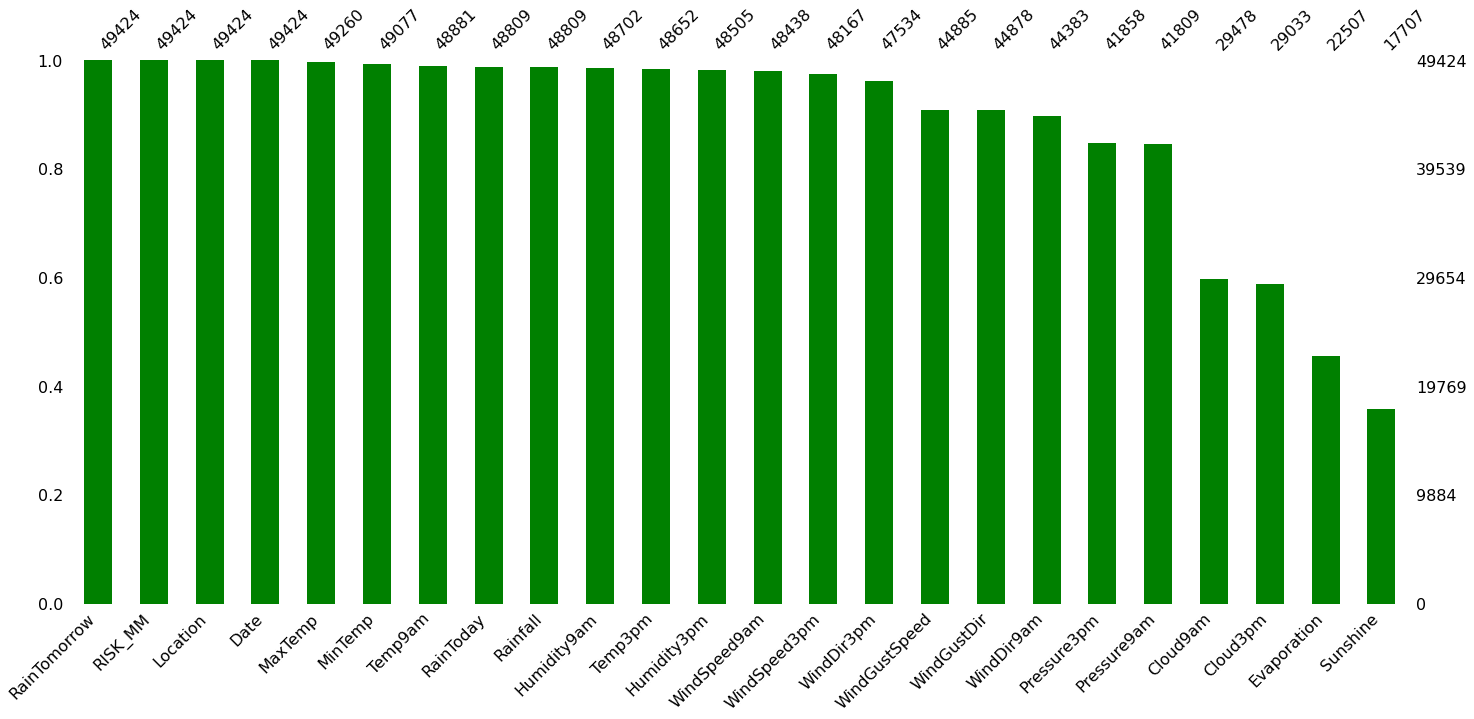

In [91]:
# Checking the missing data in the training dataset
 
msno.bar(train_data,sort='descending',color='green') 

In [92]:
# Exploring missing values
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,31717,0.641733
Evaporation,26917,0.544614
Cloud3pm,20391,0.412573
Cloud9am,19946,0.403569


# Feature Engineering

In [93]:
# "RainToday" and "RainTomorrow" features will be converted into binary (1/0)
# 1 represents "Yes"
# 0 represents "No"

train_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
train_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [94]:
# Check if the text to numeric class label conversion is successful

train_data['RainTomorrow'].value_counts()/len(train_data)

0    0.777355
1    0.222645
Name: RainTomorrow, dtype: float64

In [95]:
# Balancing the class imbalance in 'RainTomorrow' feature by doing oversampling 

no = train_data[train_data.RainTomorrow == 0]
yes = train_data[train_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

oversampled['RainTomorrow'].value_counts()/len(train_data)

1    0.777355
0    0.777355
Name: RainTomorrow, dtype: float64

In [96]:
# Checking the details of missing values
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,48998,0.637663
Evaporation,42366,0.551353
Cloud3pm,29700,0.386517
Cloud9am,29538,0.384409


In [97]:
# The next step is to compute categorical columns with mode, and transform them into numerical values. Then, we will
# impute the missing values using MICE Package

In [98]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [99]:
# Compute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [100]:
# Convert categorical features to continuous features with Label Encoding
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [101]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [102]:
MiceImputed.head()
MiceImputed['RainTomorrow'].value_counts()/len(train_data)

1.0    0.777355
0.0    0.777355
Name: RainTomorrow, dtype: float64

In [103]:
# Next step is to check of the NAN Values are imputed completely or not

MiceImputed.isna()

# The NAN values are removed completely

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2752,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
# InterQuartileRange is used to detect the outliers from the MiceImputed data

Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1338.000000
Location           11.000000
MinTemp             9.600000
MaxTemp             8.800000
Rainfall            2.400000
Evaporation         3.843849
Sunshine            6.286577
WindGustDir         7.000000
WindGustSpeed      19.000000
WindDir9am          9.000000
WindDir3pm          7.000000
WindSpeed9am       13.000000
WindSpeed3pm       13.000000
Humidity9am        25.510397
Humidity3pm        33.000000
Pressure9am         7.857209
Pressure3pm         7.900000
Cloud9am            4.000000
Cloud3pm            3.621614
Temp9am             8.800000
Temp3pm             8.400000
RainToday           1.000000
RISK_MM             5.400000
RainTomorrow        1.000000
dtype: float64


In [105]:
# Removing outliers from dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(53691, 24)

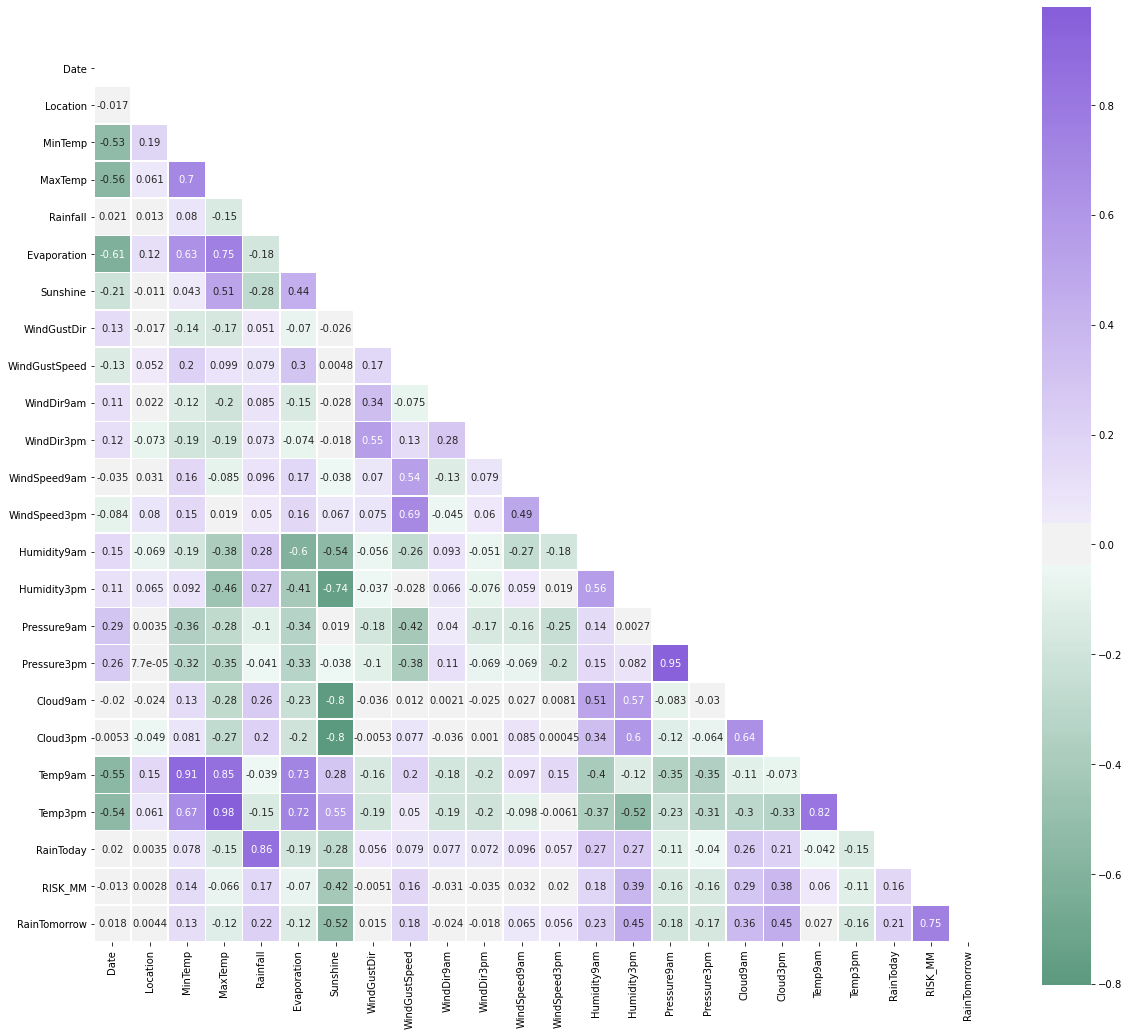

In [106]:
# Now the training dataset is free from outliers. Next step is to check if any feature is correlated highly with any other feature

# Correlation Heatmap
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})


## Findings

### Some of the pairs that have correlation are: Pressure9am and  Presssure3pm, Temp9am and Temp3pm, etc.

### Since none of the variables have same correlation, we are not discarding any features as every feature might add value to the training.

# Feature Selection

In [107]:
# Feature Selection by Fileter Method(Chi-Square Value):
# Standardize the data using MinMaxScaler instead of StandardScaler to avoid negative values

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.257958,0.0,0.607784,0.531250,0.436173,0.595825,0.484960,0.866667,0.521127,0.866667,...,0.217038,0.182109,0.240955,0.880865,0.516030,0.518732,0.546269,0.210354,0.000000,0.0
1,0.290157,0.0,0.428144,0.593750,0.373526,0.621676,0.731101,0.933333,0.521127,0.400000,...,0.247152,0.274760,0.263149,0.346014,0.306094,0.527378,0.620896,0.210354,0.000000,0.0
2,0.322356,0.0,0.592814,0.610795,0.373526,0.710007,0.791328,1.000000,0.549296,0.866667,...,0.297342,0.178914,0.291683,0.308351,0.206756,0.636888,0.588060,0.210354,0.000000,0.0
3,0.331138,0.0,0.482036,0.676136,0.373526,0.641297,0.795405,0.266667,0.239437,0.600000,...,0.156810,0.498403,0.421672,0.296545,0.246651,0.553314,0.686567,0.210354,0.074627,0.0
4,0.334065,0.0,0.730539,0.798295,0.477938,0.670525,0.399999,0.866667,0.478873,0.066667,...,0.327455,0.281150,0.206080,0.794360,0.827023,0.544669,0.782090,0.210354,0.014925,0.0


In [108]:
# Feature Importance using Filter Method (Chi-Square)

X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


In [109]:
# To double check the above, we will check if other variables has low feature importance compared to RISK_MM with respect
# to the target variable

permutation = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(permutation, feature_names = X.columns.tolist())

Weight,Feature
0.4757 ± 0.0041,RISK_MM
0 ± 0.0000,MaxTemp
0 ± 0.0000,Rainfall
0 ± 0.0000,Evaporation
0 ± 0.0000,Sunshine
0 ± 0.0000,WindGustDir
0 ± 0.0000,WindGustSpeed
0 ± 0.0000,WindDir9am
0 ± 0.0000,WindDir3pm
0 ± 0.0000,Cloud3pm


In [110]:
# From the above, it is proved that RISK_MM has the highest feature importance with respect to the 
# target variable, so it is good to drop(not consider) that variable when constructing models

In [111]:
# Training with different models

features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [112]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='darkorange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [113]:

from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Greens_r, normalize = 'all')
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.7948297697981077
ROC Area under Curve = 0.7746074864543182
Time taken = 0.4099712371826172
              precision    recall  f1-score   support

         0.0    0.80771   0.86896   0.83721      8150
         1.0    0.77057   0.68026   0.72260      5273

    accuracy                        0.79483     13423
   macro avg    0.78914   0.77461   0.77991     13423
weighted avg    0.79312   0.79483   0.79219     13423



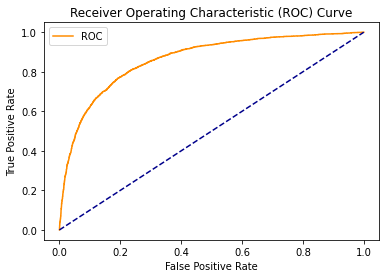

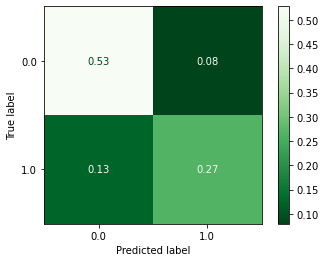

In [114]:
# Model 1 - Logistic Regression 

params_lr = {'penalty': 'l2', 'solver':'newton-cg'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8969678909334724
ROC Area under Curve = 0.8982495151245086
Time taken = 0.1989121437072754
              precision    recall  f1-score   support

         0.0    0.93506   0.89227   0.91317      8150
         1.0    0.84449   0.90423   0.87334      5273

    accuracy                        0.89697     13423
   macro avg    0.88978   0.89825   0.89325     13423
weighted avg    0.89948   0.89697   0.89752     13423



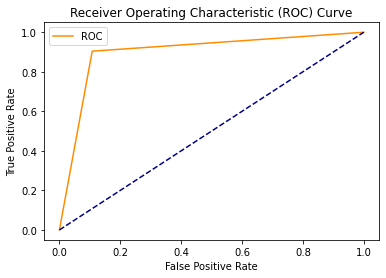

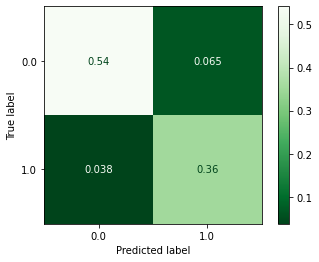

In [115]:
# Model 2 - Decision Tree

params_dt = {'max_depth': 32,
             'max_features': "log2"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.7446174476644565
ROC Area under Curve = 0.7354670104328219
Time taken = 0.04990196228027344
              precision    recall  f1-score   support

         0.0    0.79653   0.77816   0.78724      8150
         1.0    0.66893   0.69277   0.68064      5273

    accuracy                        0.74462     13423
   macro avg    0.73273   0.73547   0.73394     13423
weighted avg    0.74640   0.74462   0.74536     13423



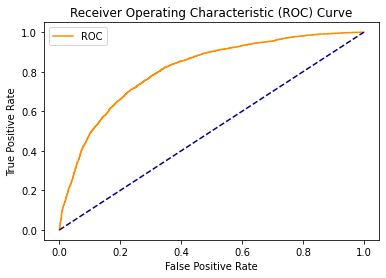

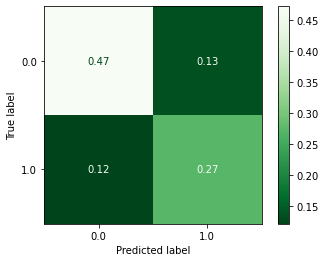

In [116]:
#Model 3 - Gaussian Naive Bayes

params_gnb = {
             'var_smoothing':1e-9}
model_gnb = GaussianNB(**params_gnb)
model_gnb, accuracy_gnb, roc_auc_gnb, tt_gnb = run_model(model_gnb, X_train, y_train, X_test, y_test)



test accuracy: 0.74462
Accuracy = 0.7446174476644565
ROC Area under Curve = 0.7354670104328219
Time taken = 0.03002190589904785
              precision    recall  f1-score   support

         0.0    0.79653   0.77816   0.78724      8150
         1.0    0.66893   0.69277   0.68064      5273

    accuracy                        0.74462     13423
   macro avg    0.73273   0.73547   0.73394     13423
weighted avg    0.74640   0.74462   0.74536     13423



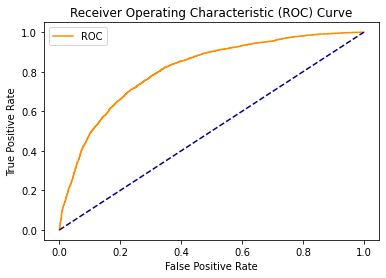

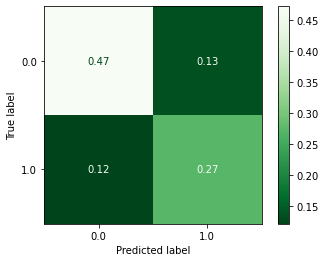

In [117]:
#Model 3 - Gaussian Naive Bayes without parameters

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
prediction_y = gaussian.predict(X_test)
prediction_y =gaussian.predict(X_test)
X=accuracy_score(y_test, prediction_y)
print('test accuracy: %.5f' % X)
gaussian, accuracy_gaussian, roc_auc_gaussian, tt_gaussian = run_model(gaussian, X_train, y_train, X_test, y_test)

Accuracy = 0.9213290620576622
ROC Area under Curve = 0.9196832573394501
Time taken = 43.96742820739746
              precision    recall  f1-score   support

         0.0    0.94216   0.92736   0.93470      8150
         1.0    0.89039   0.91200   0.90107      5273

    accuracy                        0.92133     13423
   macro avg    0.91627   0.91968   0.91788     13423
weighted avg    0.92182   0.92133   0.92149     13423



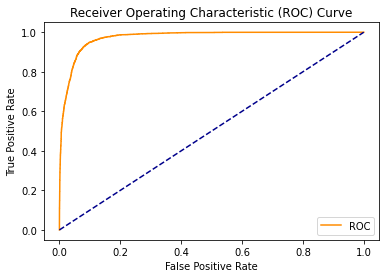

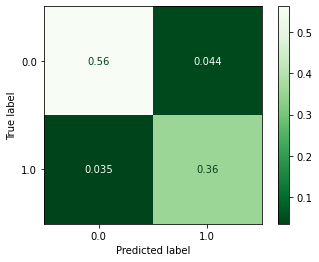

In [118]:
# Model 4 - Neural Network (Multilayer Perceptron)

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'relu',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

In [121]:
# Applying 5 - fold cross validation for the decision tree model

# Applying 5-Fold Cross Validation

scores = cross_val_score(model_nn, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


Cross-validation scores:[0.92003973 0.91631487 0.92500621 0.91779461 0.92077487]


In [122]:
# Find the Average Cross - Validation Score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9200


In [149]:
# From the above, CV does not improve the accuracy of the model. 

# References - https://www.kaggle.com/